In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import requests
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 

## Partie 1 : La récupération et le traitement des données

#### Traitement de la base départs

##### Importation de la base

Ici on doit expliquer pourquoi l'importation en ligne n'a pas fonctionner

In [17]:
df1=pd.read_excel("Detailed_Statistics_Departures.xlsx")
# Afficher les 5 premières lignes pour vérifier
df1.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,2020-01-01 00:00:00,1.0,N110AN,LAX,07:30:00,07:30:00,393.0,404.0,0.0,07:57:00,27.0,0.0,0.0,0.0,0.0,0.0
1,AA,2020-01-01 00:00:00,3.0,N111ZM,LAX,12:30:00,12:24:00,389.0,370.0,-6.0,12:38:00,14.0,0.0,0.0,0.0,0.0,0.0
2,AA,2020-01-01 00:00:00,111.0,N663AW,CLT,12:00:00,13:11:00,127.0,119.0,71.0,13:34:00,23.0,19.0,0.0,0.0,0.0,44.0
3,AA,2020-01-01 00:00:00,117.0,N113AN,LAX,19:30:00,19:26:00,402.0,379.0,-4.0,19:51:00,25.0,0.0,0.0,0.0,0.0,0.0
4,AA,2020-01-01 00:00:00,179.0,N103NN,SFO,10:30:00,10:25:00,409.0,392.0,-5.0,10:42:00,17.0,0.0,0.0,0.0,0.0,0.0


Les deux dernières lignes de notre fichier excel correspondent à la source des données. Ainsi, on peut les supprimer. 

In [18]:
# Identifier les index des deux dernières lignes
ind= df1.index[-2:]

# Supprimer ces lignes
df1 = df1.drop(ind)

##### Extraction du jour du vol de la colonne 'Date (MM/DD/YYYY)'


D'après la sortie du code précédent, nous pouvons clairement voir que la colonne Date (MM/DD/YYYY) ne contient pas uniquement la date du jour du vol mais aussi la chaîne de caractère 00:00:00 qui renvoie à l'heure du début d'un jour.

In [19]:
df1.rename(columns={'Date (MM/DD/YYYY)': 'Date'}, inplace=True)

In [20]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [21]:
df1['Date'] = df1['Date'].dt.date

Nous souhaitons que la date soit au format "DD/MM/YYYY"

In [22]:
df1['Date'] =pd.to_datetime(df1['Date'], format="format='%m/%d/%Y")

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57410 entries, 0 to 57409
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Carrier Code                              57410 non-null  object        
 1   Date                                      57410 non-null  datetime64[ns]
 2   Flight Number                             57410 non-null  float64       
 3   Tail Number                               57184 non-null  object        
 4   Destination Airport                       57410 non-null  object        
 5   Scheduled departure time                  57410 non-null  object        
 6   Actual departure time                     57410 non-null  object        
 7   Scheduled elapsed time (Minutes)          57410 non-null  float64       
 8   Actual elapsed time (Minutes)             57410 non-null  float64       
 9   Departure delay (Minutes)   

In [24]:
df1.head()

,Carrier Code,Date,Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,2020-01-01,1.0,N110AN,LAX,07:30:00,07:30:00,393.0,404.0,0.0,07:57:00,27.0,0.0,0.0,0.0,0.0,0.0
1,AA,2020-01-01,3.0,N111ZM,LAX,12:30:00,12:24:00,389.0,370.0,-6.0,12:38:00,14.0,0.0,0.0,0.0,0.0,0.0
2,AA,2020-01-01,111.0,N663AW,CLT,12:00:00,13:11:00,127.0,119.0,71.0,13:34:00,23.0,19.0,0.0,0.0,0.0,44.0
3,AA,2020-01-01,117.0,N113AN,LAX,19:30:00,19:26:00,402.0,379.0,-4.0,19:51:00,25.0,0.0,0.0,0.0,0.0,0.0
4,AA,2020-01-01,179.0,N103NN,SFO,10:30:00,10:25:00,409.0,392.0,-5.0,10:42:00,17.0,0.0,0.0,0.0,0.0,0.0


##### Selection des variables non porteuses de sens à notre problématique

In [25]:
#justification suppression variables vols : 
#Flight number : peu informatif pour la prédiction 
#Tail Number : permet d'identifier des pbs liés à des avions spécifiques (rare)
#Scheduled elapsed time / Actual elapsed time : le temps de vol prévu/réel pas pertinent pour prédire les retards

In [26]:
df1.drop(columns=["Carrier Code","Flight Number","Tail Number",
"Scheduled elapsed time (Minutes)","Actual elapsed time (Minutes)", "Departure delay (Minutes)"], inplace=True)

##### Création de variables pertinentes pour expliquer les retards

##### Création de la colonne Weekday_Flight

Nous aimerions aussi voir si le retard d'un vol peut être lié au jour de la semaine où le vol aura lieu. Pour cela, il est nécessaire de créer une colonne contenant le jour de la semaine (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday) correspondant à chaque vol de notre data frame.



In [27]:
# Convertir la colonne 'Date' en format datetime 
df1['Date'] = pd.to_datetime(df1['Date'])

# Créer la colonne Weekday_Flight avec les jours de la semaine correspondant aux dates des vols
df1['Weekday_Flight'] = df1['Date'].dt.day_name()

# Afficher Date et Weekday_Flight
print(df1[['Date','Weekday_Flight']])

            Date Weekday_Flight
0     2020-01-01      Wednesday
1     2020-01-01      Wednesday
2     2020-01-01      Wednesday
3     2020-01-01      Wednesday
4     2020-01-01      Wednesday
...          ...            ...
57405 2023-12-31         Sunday
57406 2023-12-31         Sunday
57407 2023-12-31         Sunday
57408 2023-12-31         Sunday
57409 2023-12-31         Sunday

[57410 rows x 2 columns]


##### Création de la colonne Season

La variable "saison" peut influencer les retards des vols en raison des variations météorologiques et des volumes de trafic spécifiques à chaque période de l'année. Par exemple, l’hiver apporte souvent des conditions difficiles comme la neige ou le brouillard, tandis que l’été, marqué par un trafic élevé, peut être perturbé par des orages ou des surcharges aéroportuaires. Ainsi, en tenant compte des saisons, il devient possible de mieux comprendre et anticiper les facteurs contribuant aux retards.



In [28]:
# Définir une fonction qui détermine pour une date données la saison correspondante
def get_season(date):
    year = date.year
    if date >= pd.Timestamp(year=year, month=3, day=21) and date < pd.Timestamp(year=year, month=6, day=21):
        return 'Printemps'
    elif date >= pd.Timestamp(year=year, month=6, day=21) and date < pd.Timestamp(year=year, month=9, day=23):
        return 'Été'
    elif date >= pd.Timestamp(year=year, month=9, day=23) and date < pd.Timestamp(year=year, month=12, day=21):
        return 'Automne'
    else:
        return 'Hiver'


# Convertir la colonne Date en datetime 
df1['Date'] = pd.to_datetime(df1['Date'])

# Appliquer la fonction sur la colonne Date du dataframe
df1['Season'] = df1['Date'].apply(get_season)

# Afficher  des observations aléatoires du DataFrame
print(df1.Season[1000:1010])
print(df1.Season[2000:2010])

1000    Printemps
1001    Printemps
1002    Printemps
1003    Printemps
1004    Printemps
1005    Printemps
1006    Printemps
1007    Printemps
1008    Printemps
1009    Printemps
Name: Season, dtype: object
2000    Automne
2001    Automne
2002    Automne
2003    Automne
2004    Automne
2005    Automne
2006    Automne
2007    Automne
2008    Automne
2009    Automne
Name: Season, dtype: object


##### Création de la colonne Period_Day

In [29]:
# Définir une fonction pour attribuer la période de la journée
def definir_periode(heure):
    if heure >= pd.to_datetime('06:00', format='%H:%M').time() and heure < pd.to_datetime('12:00', format='%H:%M').time():
        return 'Matin'
    elif heure >= pd.to_datetime('12:00', format='%H:%M').time() and heure < pd.to_datetime('18:00', format='%H:%M').time():
        return 'Après-midi'
    else:
        return 'Soir'

# Convertir la colonne en type datetime
df1['Scheduled departure time'] = pd.to_datetime(df1['Scheduled departure time'], format='%H:%M:%S')

# Appliquer la fonction pour créer une nouvelle colonne
df1['Period_Day'] = df1['Scheduled departure time'].dt.time.apply(definir_periode)

# Reconvertir les colonnes "Scheduled departure time" et "Actual departure time" pour ne garder que l'heure 
df1['Scheduled departure time'] = df1['Scheduled departure time'].dt.time

# Afficher les colonnes Period_Day et Scheduled departure time
print(df1[['Scheduled departure time','Period_Day']])

      Scheduled departure time  Period_Day
0                     07:30:00       Matin
1                     12:30:00  Après-midi
2                     12:00:00  Après-midi
3                     19:30:00        Soir
4                     10:30:00       Matin
...                        ...         ...
57405                 17:29:00  Après-midi
57406                 12:30:00  Après-midi
57407                 06:59:00       Matin
57408                 08:59:00       Matin
57409                 12:59:00  Après-midi

[57410 rows x 2 columns]


##### Création de notre variable cible Y=Delay

Le retard d'un vol au départ se définit comme l'écart entre l'heure de départ ou d'arrivée prévue d'un vol, telle qu'indiquée dans le programme, et l'heure réelle à laquelle le vol décolle.. Un vol est souvent considéré en retard si cet écart dépasse un seuil défini, par exemple 5 minutes.



In [30]:
# Convertir les colonnes "Scheduled departure time" et "Actual departure time" en objets datetime
df1['Scheduled departure time'] = pd.to_datetime(df1['Scheduled departure time'], format='%H:%M:%S')
df1['Actual departure time'] = pd.to_datetime(df1['Actual departure time'], format='%H:%M:%S')

# Création de la variable cible "Retard en calculant la différence en minutes et appliquer la condition
df1['Retard'] = ((df1['Actual departure time'] - df1['Scheduled departure time']).dt.total_seconds() / 60 > 0).astype(int)

# Afficher les colonnes "Actual departure time", "Scheduled departure time" et "Retard"
print(df1[['Actual departure time', 'Scheduled departure time', 'Retard']])

      Actual departure time Scheduled departure time  Retard
0       1900-01-01 07:30:00      1900-01-01 07:30:00       0
1       1900-01-01 12:24:00      1900-01-01 12:30:00       0
2       1900-01-01 13:11:00      1900-01-01 12:00:00       1
3       1900-01-01 19:26:00      1900-01-01 19:30:00       0
4       1900-01-01 10:25:00      1900-01-01 10:30:00       0
...                     ...                      ...     ...
57405   1900-01-01 17:25:00      1900-01-01 17:29:00       0
57406   1900-01-01 12:26:00      1900-01-01 12:30:00       0
57407   1900-01-01 06:57:00      1900-01-01 06:59:00       0
57408   1900-01-01 08:53:00      1900-01-01 08:59:00       0
57409   1900-01-01 12:57:00      1900-01-01 12:59:00       0

[57410 rows x 3 columns]


In [31]:

# Reconvertir les colonnes "Scheduled departure time" et "Actual departure time" pour ne garder que l'heure 
df1['Scheduled departure time'] = df1['Scheduled departure time'].dt.time
df1['Actual departure time'] = df1['Actual departure time'].dt.time

# Afficher les colonnes "Actual departure time", "Scheduled departure time" et "Retard"
print(df1[['Actual departure time', 'Scheduled departure time', 'Retard']])

      Actual departure time Scheduled departure time  Retard
0                  07:30:00                 07:30:00       0
1                  12:24:00                 12:30:00       0
2                  13:11:00                 12:00:00       1
3                  19:26:00                 19:30:00       0
4                  10:25:00                 10:30:00       0
...                     ...                      ...     ...
57405              17:25:00                 17:29:00       0
57406              12:26:00                 12:30:00       0
57407              06:57:00                 06:59:00       0
57408              08:53:00                 08:59:00       0
57409              12:57:00                 12:59:00       0

[57410 rows x 3 columns]


##### Traitement des variables catégorielle

In [32]:
#on initialise l'encodeur
label_encoder = LabelEncoder()

##### Encodage de la variable Weekday_Flight

In [33]:
#On affiche les différentes modalités de la variable
df1['Weekday_Flight'].unique()

array(['Wednesday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Thursday'], dtype=object)

In [34]:
# Encodage de la variable Weekday_Flight
df1['Weekday_Flight_encoded'] = label_encoder.fit_transform(df1['Weekday_Flight'])

# Récupérer les modalités de Weekday_Flight et leurs codes correspondant dans la variable Weekday_Flight_encoded
modalites_et_codes = list(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Afficher les modalités et leurs codes
print("Modalités et leurs codes :", modalites_et_codes)

#Afficher les colonnes Weekday_Flight et Weekday_Flight_encoded
print(df1[['Weekday_Flight','Weekday_Flight_encoded']])

Modalités et leurs codes : [('Friday', 0), ('Monday', 1), ('Saturday', 2), ('Sunday', 3), ('Thursday', 4), ('Tuesday', 5), ('Wednesday', 6)]
      Weekday_Flight  Weekday_Flight_encoded
0          Wednesday                       6
1          Wednesday                       6
2          Wednesday                       6
3          Wednesday                       6
4          Wednesday                       6
...              ...                     ...
57405         Sunday                       3
57406         Sunday                       3
57407         Sunday                       3
57408         Sunday                       3
57409         Sunday                       3

[57410 rows x 2 columns]


##### Encodage de la variable Season 

In [35]:
df1['Season'].unique()

array(['Hiver', 'Printemps', 'Été', 'Automne'], dtype=object)

In [36]:
# Encodage de la variable Season
df1['Season_encoded'] = label_encoder.fit_transform(df1['Season'])

# Récupérer les modalités de Season et leurs codes correspondant dans la variable Season_encoded
modalites_et_codes = list(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Afficher les modalités et leurs codes
print("Modalités et leurs codes :", modalites_et_codes)

#Afficher des valeurs aléatoires de Season et Season_encoded
print(df1[['Season', 'Season_encoded']][1000:1005])
print(df1[['Season', 'Season_encoded']][2000:2005])
print(df1[['Season', 'Season_encoded']][3000:3005])

Modalités et leurs codes : [('Automne', 0), ('Hiver', 1), ('Printemps', 2), ('Été', 3)]
         Season  Season_encoded
1000  Printemps               2
1001  Printemps               2
1002  Printemps               2
1003  Printemps               2
1004  Printemps               2
       Season  Season_encoded
2000  Automne               0
2001  Automne               0
2002  Automne               0
2003  Automne               0
2004  Automne               0
     Season  Season_encoded
3000  Hiver               1
3001  Hiver               1
3002  Hiver               1
3003  Hiver               1
3004  Hiver               1


##### Encodage de la variable Period_Day

In [37]:
df1['Period_Day'].unique()

array(['Matin', 'Après-midi', 'Soir'], dtype=object)

In [38]:
# Encodage de la variable Period_Day
df1['Period_Day_encoded'] = label_encoder.fit_transform(df1['Period_Day'])

# Récupérer les modalités de Period_Day et leurs codes correspondant dans la variable Period_Day_encoded
modalites_et_codes = list(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Afficher les modalités et leurs codes
print("Modalités et leurs codes :", modalites_et_codes)

#Afficher les colonnes Period_Day et Period_Day_encoded
print(df1[['Period_Day','Period_Day_encoded']])

Modalités et leurs codes : [('Après-midi', 0), ('Matin', 1), ('Soir', 2)]
       Period_Day  Period_Day_encoded
0           Matin                   1
1      Après-midi                   0
2      Après-midi                   0
3            Soir                   2
4           Matin                   1
...           ...                 ...
57405  Après-midi                   0
57406  Après-midi                   0
57407       Matin                   1
57408       Matin                   1
57409  Après-midi                   0

[57410 rows x 2 columns]


##### Encodage de la variable Destination Airport

In [39]:
df1['Destination Airport'].unique()

array(['LAX', 'CLT', 'SFO', 'MIA', 'ORD', 'BOS', 'EGE', 'PHX', 'DFW',
       'AUS', 'DCA', 'SNA', 'JAC', 'STT', 'LAS', 'RDU', 'FLL', 'SAT',
       'SAN'], dtype=object)

In [40]:
# Encodage de la variable Destination Airport
df1['Destination_encoded'] = label_encoder.fit_transform(df1['Destination Airport'])

# Récupérer les modalités de Destination Airport et leurs codes correspondant dans la variable Destination_encoded
modalites_et_codes1 = list(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Afficher les modalités et leurs codes
print("Modalités et leurs codes :", modalites_et_codes1)

#Afficher les colonnes Destination Airport et Destination_encoded
print(df1[['Destination Airport','Destination_encoded']])

Modalités et leurs codes : [('AUS', 0), ('BOS', 1), ('CLT', 2), ('DCA', 3), ('DFW', 4), ('EGE', 5), ('FLL', 6), ('JAC', 7), ('LAS', 8), ('LAX', 9), ('MIA', 10), ('ORD', 11), ('PHX', 12), ('RDU', 13), ('SAN', 14), ('SAT', 15), ('SFO', 16), ('SNA', 17), ('STT', 18)]
      Destination Airport  Destination_encoded
0                     LAX                    9
1                     LAX                    9
2                     CLT                    2
3                     LAX                    9
4                     SFO                   16
...                   ...                  ...
57405                 AUS                    0
57406                 MIA                   10
57407                 AUS                    0
57408                 ORD                   11
57409                 PHX                   12

[57410 rows x 2 columns]


In [41]:
df1.head()

,Date,Destination Airport,Scheduled departure time,Actual departure time,Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Weekday_Flight,Season,Period_Day,Retard,Weekday_Flight_encoded,Season_encoded,Period_Day_encoded,Destination_encoded
0,2020-01-01,LAX,07:30:00,07:30:00,07:57:00,27.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Matin,0,6,1,1,9
1,2020-01-01,LAX,12:30:00,12:24:00,12:38:00,14.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Après-midi,0,6,1,0,9
2,2020-01-01,CLT,12:00:00,13:11:00,13:34:00,23.0,19.0,0.0,0.0,0.0,44.0,Wednesday,Hiver,Après-midi,1,6,1,0,2
3,2020-01-01,LAX,19:30:00,19:26:00,19:51:00,25.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Soir,0,6,1,2,9
4,2020-01-01,SFO,10:30:00,10:25:00,10:42:00,17.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Matin,0,6,1,1,16


##### Traitement des valeurs manquantes

In [42]:
# Percentage of missing values

miss_values= df1.isnull().sum().sort_values(ascending=False)  
miss_values

percentage= (df1.isnull().sum()/df1.isnull().count().sort_values(ascending=False))
missing_data= pd.concat([miss_values, percentage], axis=1, keys=['Number of missing values', 'Percent (%)'])

missing_data

,Number of missing values,Percent (%)
Date,0,0.0
Delay Late Aircraft Arrival (Minutes),0,0.0
Period_Day_encoded,0,0.0
Season_encoded,0,0.0
Weekday_Flight_encoded,0,0.0
Retard,0,0.0
Period_Day,0,0.0
Season,0,0.0
Weekday_Flight,0,0.0
Delay Security (Minutes),0,0.0


Il n'y a pas de valeurs manquantes

### Traitement de la base météorologique

In [43]:
# URL de l'API Open-Meteo avec les paramètres requis
#url = "https://archive-api.open-meteo.com/v1/archive?latitude=40.64&longitude=-73.77&start_date=2020-11-01&end_date=2024-11-01&hourly=temperature_2m,precipitation,rain,snowfall,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m&format=csv"

url="https://archive-api.open-meteo.com/v1/archive?latitude=40.64&longitude=-73.78&start_date=2020-11-01&end_date=2024-11-01&hourly=temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm&format=csv"

# Effectuer la requête GET
response = requests.get(url)

# Vérifier si la requête a réussi
if response.status_code == 200:
    # Enregistrer le contenu dans un fichier CSV
    with open("weather_data.csv", "wb") as file:
        file.write(response.content)
    print("Téléchargement terminé ! Les données sont enregistrées dans 'weather_data.csv'.")
else:
    print(f"Erreur lors de la requête : {response.status_code}")

Téléchargement terminé ! Les données sont enregistrées dans 'weather_data.csv'.


In [44]:
#on charge le fichier csv en ignorant les 3 premières lignes
df2=pd.read_csv("weather_data.csv", skiprows=3)

In [45]:
df2['time'] = pd.to_datetime(df2['time'])

In [46]:
df2['time']=pd.to_datetime(df2['time'], format="format='%m/%d/%Y")

In [47]:
df2.head()

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,2020-11-01 00:00:00,7.4,64,1.1,4.1,0.0,0.0,0.0,0.0,3,1031.7,1031.3,100,94,0,0,0.02,0.37,9.1,14.7,189,191,19.8,8.0,9.9,15.6,19.7,0.385,0.392,0.276,0.327
1,2020-11-01 01:00:00,7.3,67,1.6,4.2,0.0,0.0,0.0,0.0,3,1031.2,1030.8,96,96,0,0,0.02,0.34,8.0,15.9,190,193,15.1,8.0,9.9,15.5,19.7,0.384,0.391,0.276,0.327
2,2020-11-01 02:00:00,7.9,67,2.1,4.7,0.0,0.0,0.0,0.0,3,1030.9,1030.5,89,89,0,0,0.02,0.35,9.4,17.9,187,189,15.5,8.0,9.8,15.5,19.7,0.384,0.390,0.276,0.327
3,2020-11-01 03:00:00,8.7,64,2.2,4.7,0.0,0.0,0.0,0.0,2,1030.0,1029.6,76,76,0,0,0.04,0.41,14.8,23.9,186,187,24.1,8.2,9.8,15.5,19.7,0.383,0.390,0.276,0.327
4,2020-11-01 04:00:00,9.0,64,2.4,4.9,0.0,0.0,0.0,0.0,3,1029.3,1028.9,95,95,0,0,0.05,0.42,16.1,25.6,209,208,28.4,8.4,9.8,15.4,19.7,0.383,0.389,0.277,0.327


#### Selection de nos variables

In [48]:
#justification suppression variables météo : 
#apparent_temperature deja une combi de temperature_2m et relative_humidity_2m
#precipitation = pluie + neige + averses
#wind_speed_100m
#shortwave_radiation, diffuse_radiation : liées au rayonnement solaire
#et0_fao_evapotranspiration
#soil_temperature_*, soil_moisture_*)

La variable cloud_cover représente la couverture nuageuse totale, c'est-à-dire la fraction de l'horizon couvert par les nuages. C'est une variable pertinente car elle affecte directement la visibilité et la sécurité des vols (notamment pour les décollages et les atterissages). 
La variable cloud_cover_low représente la couverture nuageuse basse (en dessous de 2km). Cela peut etre associé à la formation de brouillard ou de nuages bas. 

La variable wind_speed_10m représente la vitesse du vent à 10 mètres. C'est une variable pertinente car le vent peut affecter la sécurité des opérations aériennes et provoquer des retards. 
La vitesse du vent à 10 mètres est le niveau standard.
La variable wind_direction_10m représente la direction du vent à 10 mètres. La direction du vent peut affecter les décollages et atterrissages car les avions ont besoin d'un vent favorable (vent de face) pour effectuer un décollage ou un atterissage en toute sécurité. 
La variable wind_gusts_10m représente les rafales de vent. 

In [49]:
df2.drop(columns=["soil_moisture_0_to_7cm (m³/m³)", "soil_moisture_7_to_28cm (m³/m³)", 
"soil_moisture_28_to_100cm (m³/m³)", "soil_moisture_100_to_255cm (m³/m³)",
"soil_temperature_28_to_100cm (°C)", "soil_temperature_100_to_255cm (°C)",
"soil_temperature_7_to_28cm (°C)", "soil_temperature_0_to_7cm (°C)", 
"cloud_cover_mid (%)", "cloud_cover_high (%)", "wind_speed_100m (km/h)",
"wind_direction_100m (°)", "pressure_msl (hPa)", "et0_fao_evapotranspiration (mm)"
, "apparent_temperature (°C)", "rain (mm)", "snowfall (cm)" ], inplace=True)

#### Traitement des valeurs manquantes

In [50]:
# Percentage of missing values

miss_values= df2.isnull().sum().sort_values(ascending=False)  
miss_values

percentage= (df2.isnull().sum()/df2.isnull().count().sort_values(ascending=False))
missing_data= pd.concat([miss_values, percentage], axis=1, keys=['Number of missing values', 'Percent (%)'])

missing_data

,Number of missing values,Percent (%)
snow_depth (m),480,0.01368
time,0,0.00000
temperature_2m (°C),0,0.00000
relative_humidity_2m (%),0,0.00000
dew_point_2m (°C),0,0.00000
precipitation (mm),0,0.00000
weather_code (wmo code),0,0.00000
surface_pressure (hPa),0,0.00000
cloud_cover (%),0,0.00000
cloud_cover_low (%),0,0.00000


In [51]:
#on remplace par la moyenne 
df2['snow_depth (m)'] = df2['snow_depth (m)'].fillna(df2['snow_depth (m)'].mean())

### Fusion des deux bases de données

In [52]:
df1['time'] = pd.to_datetime(df1['Date'].astype(str) + ' ' + df1['Scheduled departure time'].astype(str))

In [53]:
df1['time'] = df1['time'].dt.round('H')

/var/folders/z4/l1g2ltz55419x6y847ly0r800000gn/T/ipykernel_17911/786802130.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df1['time'] = df1['time'].dt.round('H')


In [54]:
df1.head(10)

,Date,Destination Airport,Scheduled departure time,Actual departure time,Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Weekday_Flight,Season,Period_Day,Retard,Weekday_Flight_encoded,Season_encoded,Period_Day_encoded,Destination_encoded,time
0,2020-01-01,LAX,07:30:00,07:30:00,07:57:00,27.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Matin,0,6,1,1,9,2020-01-01 08:00:00
1,2020-01-01,LAX,12:30:00,12:24:00,12:38:00,14.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Après-midi,0,6,1,0,9,2020-01-01 12:00:00
2,2020-01-01,CLT,12:00:00,13:11:00,13:34:00,23.0,19.0,0.0,0.0,0.0,44.0,Wednesday,Hiver,Après-midi,1,6,1,0,2,2020-01-01 12:00:00
3,2020-01-01,LAX,19:30:00,19:26:00,19:51:00,25.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Soir,0,6,1,2,9,2020-01-01 20:00:00
4,2020-01-01,SFO,10:30:00,10:25:00,10:42:00,17.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Matin,0,6,1,1,16,2020-01-01 10:00:00
5,2020-01-01,MIA,14:45:00,14:45:00,15:01:00,16.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Après-midi,0,6,1,0,10,2020-01-01 15:00:00
6,2020-01-01,LAX,09:00:00,08:58:00,09:17:00,19.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Matin,0,6,1,1,9,2020-01-01 09:00:00
7,2020-01-01,LAX,20:30:00,20:26:00,20:58:00,32.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Soir,0,6,1,2,9,2020-01-01 20:00:00
8,2020-01-01,LAX,18:30:00,18:24:00,18:50:00,26.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Soir,0,6,1,2,9,2020-01-01 18:00:00
9,2020-01-01,LAX,17:00:00,16:58:00,17:15:00,17.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Après-midi,0,6,1,0,9,2020-01-01 17:00:00


In [55]:
df=pd.merge(df1, df2, on='time', how='inner')

In [56]:
df.head()

,Date,Destination Airport,Scheduled departure time,Actual departure time,Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Weekday_Flight,Season,Period_Day,Retard,Weekday_Flight_encoded,Season_encoded,Period_Day_encoded,Destination_encoded,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),snow_depth (m),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h)
0,2021-01-01,LAX,09:00:00,08:55:00,09:15:00,20.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Matin,0,0,1,1,9,2021-01-01 09:00:00,-1.8,83,-4.3,0.0,0.0,3,1031.6,99,0,0.09,9.0,2,16.2
1,2021-01-01,LAX,18:05:00,18:04:00,18:32:00,28.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Soir,0,0,1,2,9,2021-01-01 18:00:00,4.0,65,-1.9,0.0,0.0,3,1030.1,100,0,0.28,10.6,100,22.7
2,2021-01-01,SFO,07:30:00,07:25:00,07:40:00,15.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Matin,0,0,1,1,16,2021-01-01 08:00:00,-1.6,82,-4.3,0.0,0.0,0,1031.7,14,0,0.10,9.2,349,16.2
3,2021-01-01,CLT,11:52:00,11:46:00,12:02:00,16.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Matin,0,0,1,1,2,2021-01-01 12:00:00,-1.2,81,-4.0,0.0,0.0,3,1032.8,100,0,0.10,10.0,21,19.1
4,2021-01-01,MIA,14:30:00,14:24:00,14:40:00,16.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Après-midi,0,0,1,0,10,2021-01-01 14:00:00,0.8,73,-3.5,0.0,0.0,3,1033.4,99,0,0.17,11.6,36,20.9


##### Vérification de la multicolinéarité

Nous devons vérifier la corrélation entre nos variables explicatives.

In [57]:
X = df.drop(columns=['Retard','Scheduled departure time', "Actual departure time", 'Wheels-off time', 'time', 'Date','Weekday_Flight','Season','Period_Day','Destination Airport'])

In [58]:
correlation_matrix = X.corr()
print(correlation_matrix)

                                          Taxi-Out time (Minutes)  \
Taxi-Out time (Minutes)                                  1.000000   
Delay Carrier (Minutes)                                  0.043822   
Delay Weather (Minutes)                                  0.071933   
Delay National Aviation System (Minutes)                 0.423262   
Delay Security (Minutes)                                 0.014219   
Delay Late Aircraft Arrival (Minutes)                    0.076980   
Weekday_Flight_encoded                                  -0.038965   
Season_encoded                                           0.074573   
Period_Day_encoded                                       0.028689   
Destination_encoded                                      0.054998   
temperature_2m (°C)                                      0.132525   
relative_humidity_2m (%)                                -0.031563   
dew_point_2m (°C)                                        0.105741   
precipitation (mm)                

On remarque que la corrélation entre les variables wind_speed_10m (qui représente la vitesse du vent à 10m) et wind_gusts_10m (qui représente les rafales de vent) est de 0,95. Ainsi, nous choissons de supprimer la variable wind_gusts_10m.

La corrélation entre les variables temperature_2m (qui représente la température de l'air à 2 mètres au-dessus du sol) et dew_point_2m (qui représente la température du point de rosée) est égalemement elevé (0,91). Nous supprimerons la variable dew_point_2m. 

In [59]:
df.drop(columns=['wind_gusts_10m (km/h)', 'dew_point_2m (°C)'], inplace=True)

In [60]:
df.head()

,Date,Destination Airport,Scheduled departure time,Actual departure time,Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Weekday_Flight,Season,Period_Day,Retard,Weekday_Flight_encoded,Season_encoded,Period_Day_encoded,Destination_encoded,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),snow_depth (m),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction_10m (°)
0,2021-01-01,LAX,09:00:00,08:55:00,09:15:00,20.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Matin,0,0,1,1,9,2021-01-01 09:00:00,-1.8,83,0.0,0.0,3,1031.6,99,0,0.09,9.0,2
1,2021-01-01,LAX,18:05:00,18:04:00,18:32:00,28.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Soir,0,0,1,2,9,2021-01-01 18:00:00,4.0,65,0.0,0.0,3,1030.1,100,0,0.28,10.6,100
2,2021-01-01,SFO,07:30:00,07:25:00,07:40:00,15.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Matin,0,0,1,1,16,2021-01-01 08:00:00,-1.6,82,0.0,0.0,0,1031.7,14,0,0.10,9.2,349
3,2021-01-01,CLT,11:52:00,11:46:00,12:02:00,16.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Matin,0,0,1,1,2,2021-01-01 12:00:00,-1.2,81,0.0,0.0,3,1032.8,100,0,0.10,10.0,21
4,2021-01-01,MIA,14:30:00,14:24:00,14:40:00,16.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Après-midi,0,0,1,0,10,2021-01-01 14:00:00,0.8,73,0.0,0.0,3,1033.4,99,0,0.17,11.6,36


In [61]:
#df.to_csv('data.csv', index=False)

## Partie 2 : Analyse descriptive et représentation graphique

In [62]:
# Calcul des pourcentages pour chaque modalité
modalites = (df['Retard'].value_counts(normalize=True) * 100).round(2)
print("Pourcentage de retard :", modalites[1], "%")
print("Pourcentage de non retard :", modalites[0], "%")

Pourcentage de retard : 31.73 %
Pourcentage de non retard : 68.27 %


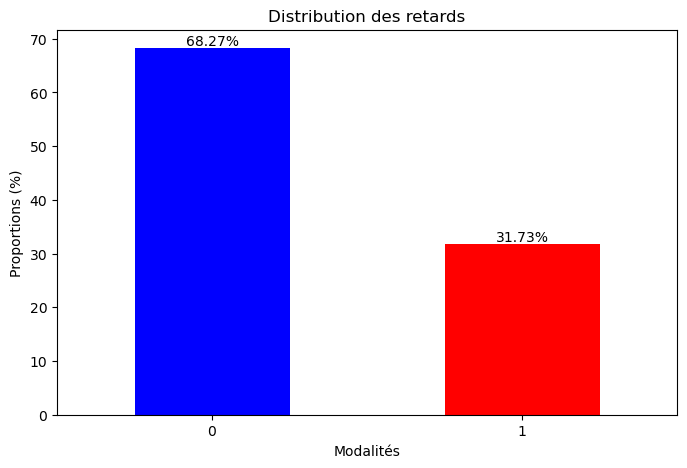

In [63]:
# Création du graphique en barres
ax = modalites.plot(kind='bar', color=['blue', 'red'], figsize=(8, 5))
plt.title('Distribution des retards')
plt.xlabel('Modalités')
plt.ylabel('Proportions (%)')

# Ajout des annotations pour indiquer les pourcentages au-dessus des barres
for i, v in enumerate(modalites):
    ax.annotate(f"{v}%", xy=(i, v), ha='center', va='bottom')

plt.xticks(rotation=0)

# Affichage du graphique
plt.show()

On peut remarquer qu'environ 32% des vols dans notre base de données ont un retard. Ainsi, 68% des vols sont à l'heure, indiquant une bone ponctualité globale des vols dans l'échantillon. 

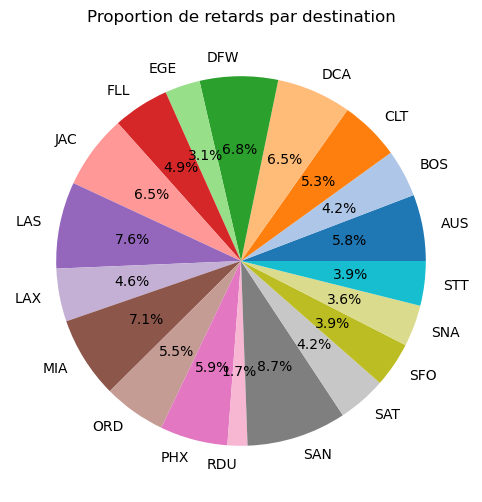

In [64]:
#On calcule la proportion des retards pour chaque destination
prop_retards_par_destination = df.groupby('Destination Airport')['Retard'].mean() * 100

# Créer le graphique en camembert
plt.figure(figsize=(8, 6))
colors = plt.cm.tab20(range(len(prop_retards_par_destination)))  # Choisir une palette de 20 couleurs
plt.pie(prop_retards_par_destination, labels=prop_retards_par_destination.index, autopct='%1.1f%%', colors=colors)
plt.title("Proportion de retards par destination")

# Afficher le graphique
plt.show()

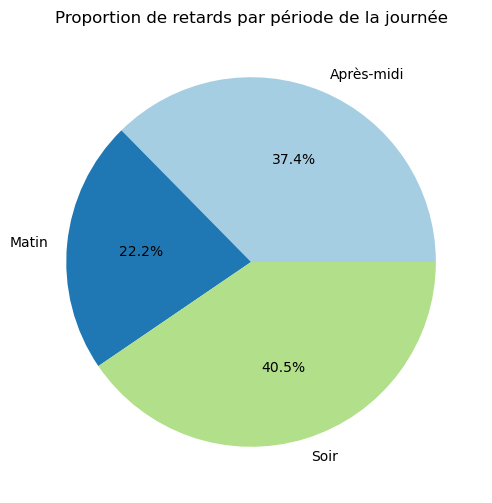

In [65]:
# Calculer la proportion des retards pour chaque période (par mois ici)
proportion_retards_par_periode = df.groupby('Period_Day')['Retard'].mean() * 100

# Créer un graphique en camembert
plt.figure(figsize=(8, 6))
plt.pie(proportion_retards_par_periode, labels=proportion_retards_par_periode.index.astype(str), 
        autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Proportion de retards par période de la journée")

# Afficher le graphique
plt.show()

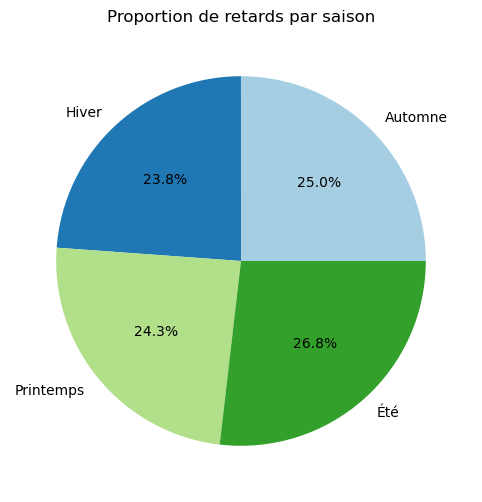

In [66]:
# Calculer la proportion des retards pour chaque période (par mois ici)
prop_retards_par_saison = df.groupby('Season')['Retard'].mean() * 100

# Créer un graphique en camembert
plt.figure(figsize=(8, 6))
plt.pie(prop_retards_par_saison, labels=prop_retards_par_saison.index.astype(str), 
        autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Proportion de retards par saison")

# Afficher le graphique
plt.show()

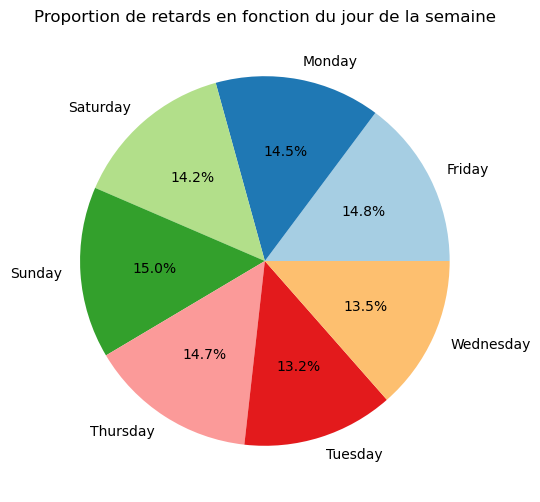

In [67]:
# Calculer la proportion des retards pour chaque période (par mois ici)
prop_retards_par_jour = df.groupby('Weekday_Flight')['Retard'].mean() * 100

# Créer un graphique en camembert
plt.figure(figsize=(8, 6))
plt.pie(prop_retards_par_jour, labels=prop_retards_par_jour.index.astype(str), 
        autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Proportion de retards en fonction du jour de la semaine")

# Afficher le graphique
plt.show()

Nous voulons explorer la relation entre les retards et les variables météorologiques. 

In [68]:
df3=df.copy()
#on divise notre variable température en 10 intervalles égaux
df3['temp'] = pd.cut(df3['temperature_2m (°C)'], bins=10) 

# Calcul du taux de retard moyen par intervalle de température
stats_temp = df3.groupby('temp')['Retard'].mean().reset_index()

/var/folders/z4/l1g2ltz55419x6y847ly0r800000gn/T/ipykernel_17911/3373336119.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_temp = df3.groupby('temp')['Retard'].mean().reset_index()


/Users/ghorafimanal/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


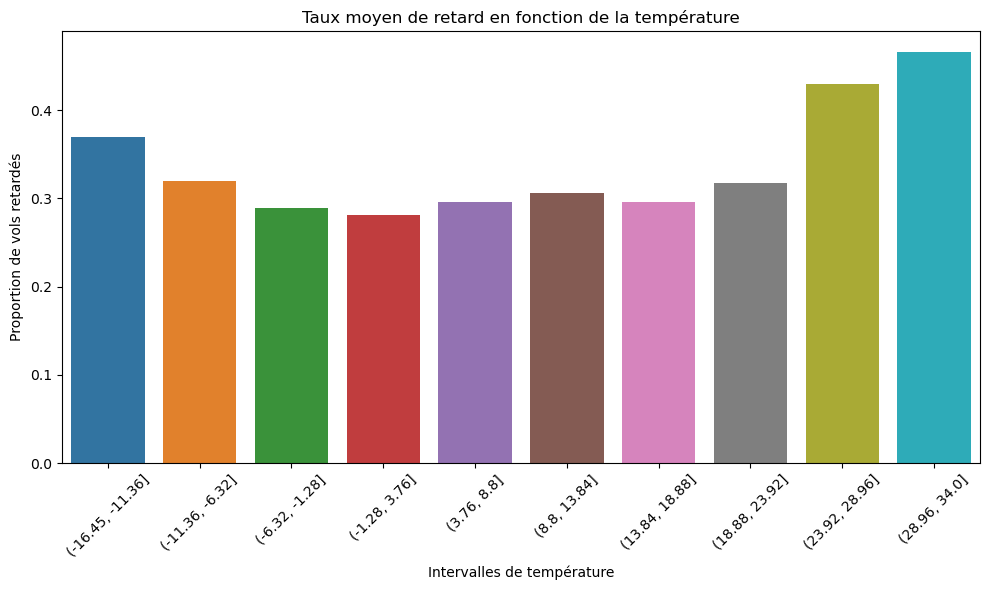

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x='temp', y='Retard', data=stats_temp)
plt.xticks(rotation=45)
plt.title("Taux moyen de retard en fonction de la température")
plt.xlabel("Intervalles de température")
plt.ylabel("Proportion de vols retardés")
plt.tight_layout()
plt.show()

/Users/ghorafimanal/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


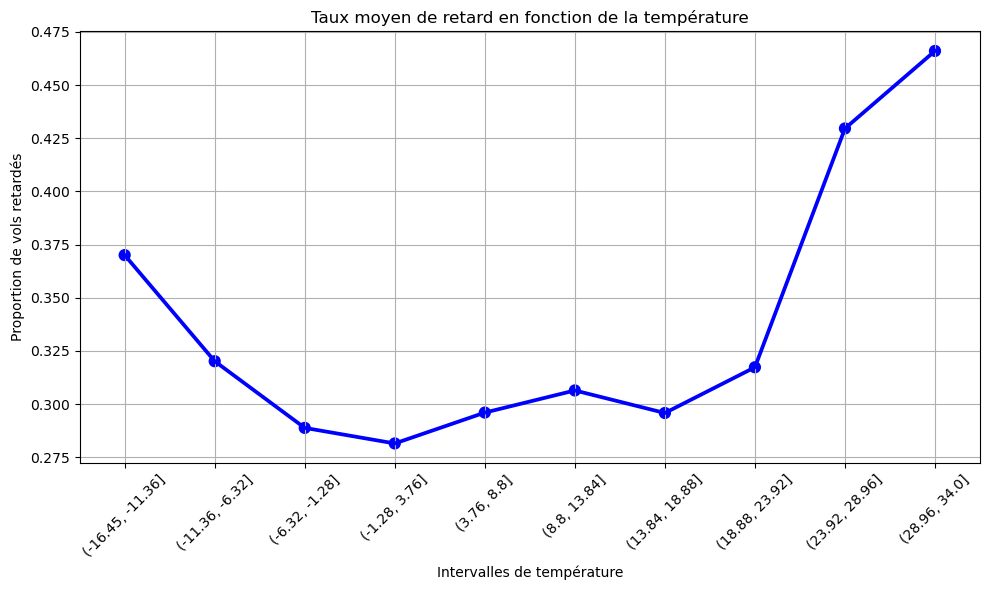

In [70]:
plt.figure(figsize=(10, 6))

# Utiliser pointplot pour tracer une "courbe" avec une variable catégorielle
sns.pointplot(x='temp', y='Retard', data=stats_temp, markers='o', color='b')

# Ajuster les limites de l'axe des ordonnées
#plt.ylim(0, 1)

plt.tight_layout()  # Ajuste la mise en page pour éviter que les étiquettes soient coupées

# Améliorations esthétiques
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.title("Taux moyen de retard en fonction de la température")
plt.xlabel("Intervalles de température")
plt.ylabel("Proportion de vols retardés")
plt.grid(True)
plt.tight_layout()

plt.show()

In [71]:
#on divise notre variable température en 10 intervalles égaux
df3['vitesse'] = pd.cut(df3['wind_speed_10m (km/h)'], bins=15) 

# Calcul du taux de retard moyen par intervalle de température
stats_wind = df3.groupby('vitesse')['Retard'].mean().reset_index()

/var/folders/z4/l1g2ltz55419x6y847ly0r800000gn/T/ipykernel_17911/1241325595.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_wind = df3.groupby('vitesse')['Retard'].mean().reset_index()


/Users/ghorafimanal/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


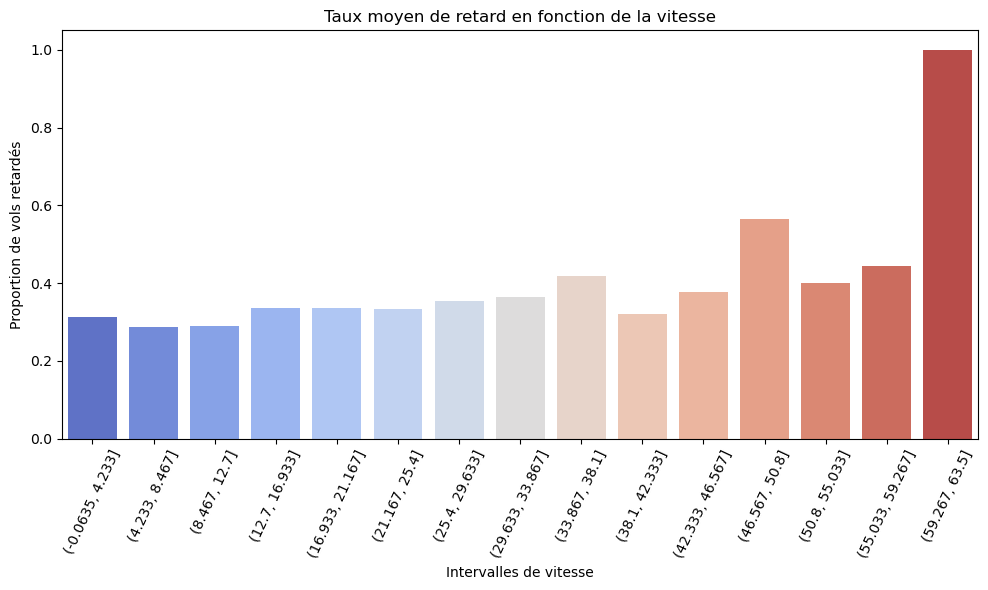

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x='vitesse', y='Retard', data=stats_wind,palette='coolwarm')
plt.xticks(rotation=65)
plt.title("Taux moyen de retard en fonction de la vitesse")
plt.xlabel("Intervalles de vitesse")
plt.ylabel("Proportion de vols retardés")
plt.tight_layout()
plt.show()

In [73]:
#on divise notre variable Couverture nuageuse en plusieurs intervalles
df3['couv_nuageuse'] = pd.cut(df3['cloud_cover (%)'], bins=15) 

In [74]:
stats_cloud = df3.groupby('couv_nuageuse')['Retard'].mean().reset_index()

/var/folders/z4/l1g2ltz55419x6y847ly0r800000gn/T/ipykernel_17911/2000028933.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_cloud = df3.groupby('couv_nuageuse')['Retard'].mean().reset_index()


/Users/ghorafimanal/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


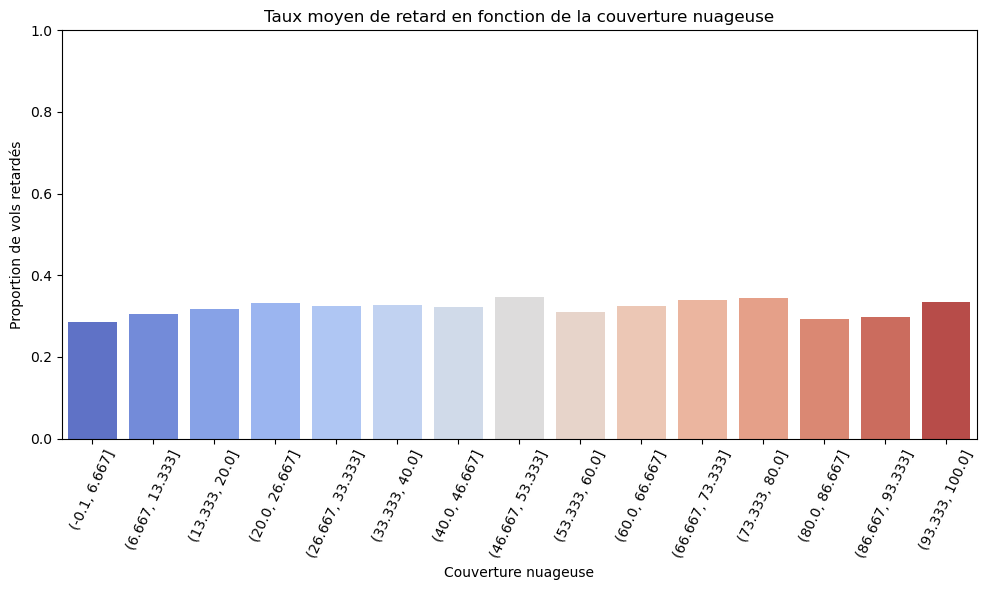

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x='couv_nuageuse', y='Retard', data=stats_cloud,palette='coolwarm')
plt.xticks(rotation=65)
plt.title("Taux moyen de retard en fonction de la couverture nuageuse")
plt.xlabel("Couverture nuageuse")
plt.ylabel("Proportion de vols retardés")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()